In [ ]:
import keras as tf
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
from PIL import Image
import os
import random
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from tensorflow.keras.metrics import PrecisionAtRecall,Recall
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import tensorflow.math

In [ ]:
path = '/content/boneage-label.csv'

classes = ["id", "boneage", "male"]
num_classes = len(classes)
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

train_gen = train_datagen.flow_from_directory(directory=path,
                                             target_size=(299, 299),
                                             class_mode='categorical',
                                             subset='training',
                                             shuffle=True, classes=classes,
                                             batch_size=16,
                                          )

test_gen = test_datagen.flow_from_directory(directory=path,
                                             target_size=(299, 299),
                                             class_mode='categorical',
                                             subset='validation',
                                             shuffle=False, classes=classes,
                                             batch_size=1,
                                             )
print(train_gen.class_indices)
l=list(train_gen.classes)
k=list(test_gen.classes)
c1=0;c2=0;c3=0;c4=0;
for i in l:
  if i==0:
    c1+=1
  elif i==1:
    c2+=1
  elif i==2:
    c3+=1
  elif i==3:
    c4+=1
  else:
    pass
print("\nTRAINING DATA\n")
print("COVID SAMPLES  "+str(c1))
print("LUNG OPACITY SAMPLES  "+str(c2))
print("NORMAL SAMPLES  "+str(c3))
print("VIRAL PNEUMONIA SAMPLES  "+str(c4))
c1=0;c2=0;c3=0;c4=0;
for i in k:
  if i==0:
    c1+=1
  elif i==1:
    c2+=1
  elif i==2:
    c3+=1
  elif i==3:
    c4+=1
  else:
    pass
print("\nTEST DATA\n")
print("id  "+str(c1))
print("boneage  "+str(c2))
print("gender  "+str(c3))

print(test_gen.classes[0])
'''for i in range(train_gen.__len__()):
   a,b=train_gen.next()
   x.append(a)
   y.append(b)
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)'''
train_labels=train_gen.classes
test_labels=test_gen.classes
print(train_labels)


Found 33824 images belonging to 4 classes.
Found 8452 images belonging to 4 classes.
{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

TRAINING DATA

COVID SAMPLES  8456
LUNG OPACITY SAMPLES  8456
NORMAL SAMPLES  8456
VIRAL PNEUMONIA SAMPLES  8456

TEST DATA

COVID SAMPLES  2113
LUNG OPACITY SAMPLES  2113
NORMAL SAMPLES  2113
VIRAL PNEUMONIA SAMPLES  2113
0
[0 0 0 ... 3 3 3]


In [ ]:
print(len((test_gen[0])[1]))

1


In [ ]:
from sklearn.metrics import classification_report


'for pred in preds:\n  preds_list.append(np.argmax(pred))'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 8
import tensorflow as tf

import warnings
warnings.simplefilter('ignore')
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

In [ ]:
!nvidia-smi

Fri Nov 12 03:54:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

acc_per_fold = []
loss_per_fold = []



In [ ]:
IMAGE_SIZE = [299, 299]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model = KerasClassifier(build_fn=model, epochs=3, batch_size=1, verbose=1) 
# 3-Fold Crossvalidation
kfold = KFold(n_splits=3, shuffle=True, random_state=2019) 
results = cross_val_score(model, train_gen, train_labels, cv=kfold)

NameError: ignored

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_gen,
  validation_data=test_gen,
  epochs=10,
  steps_per_epoch=len(train_gen),
  validation_steps=len(test_gen)
)

Epoch 1/10
2114/2114 [==============================] - 1419s 653ms/step - loss: 0.7509 - accuracy: 0.7512 - val_loss: 0.5278 - val_accuracy: 0.8319
Epoch 2/10
2114/2114 [==============================] - 1366s 646ms/step - loss: 0.6986 - accuracy: 0.7995 - val_loss: 0.5627 - val_accuracy: 0.8232
Epoch 3/10
2114/2114 [==============================] - 1364s 645ms/step - loss: 0.6508 - accuracy: 0.8239 - val_loss: 0.6769 - val_accuracy: 0.8264
Epoch 4/10
2114/2114 [==============================] - 1340s 634ms/step - loss: 0.6547 - accuracy: 0.8271 - val_loss: 0.5982 - val_accuracy: 0.8416
Epoch 5/10
2114/2114 [==============================] - 1350s 639ms/step - loss: 0.6445 - accuracy: 0.8338 - val_loss: 0.9370 - val_accuracy: 0.7664
Epoch 6/10
2114/2114 [==============================] - 1368s 647ms/step - loss: 0.6537 - accuracy: 0.8365 - val_loss: 0.6494 - val_accuracy: 0.8573
Epoch 7/10
2114/2114 [==============================] - 1363s 645ms/step - loss: 0.6479 - accuracy: 0.8441

In [ ]:
preds = model.predict(test_gen)

preds_list = []
y_pred = np.argmax(preds, axis=1)

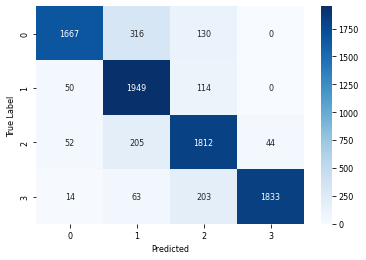

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns
cm=confusion_matrix(test_gen.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install unrar

In [1]:
!unrar x '/content/gdrive/MyDrive/boneage.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/gdrive/MyDrive/boneage.rar
No such file or directory
No files to extract
